In [1]:
!pip install nltk==3.8.1 sentence-transformers pytorch2tikz
# !pip install pytorch2tikz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.7 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=c2f3ab38cf0ae7b93de09639285b3781f435064c7f7ee629555a6f27feba70a0
  Stored in directory: /root/.cache/pip/wheels/83/71/2b/40d17d21937fed496fb99145227eca8f20b4891240ff60c86f
Successfully built sentence-transformers
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [20]:
!pip list

Package                                Version                Editable project location
-------------------------------------- ---------------------- -------------------------
absl-py                                1.4.0
accelerate                             0.12.0
access                                 1.1.8
affine                                 2.4.0
aiobotocore                            2.4.2
aiohttp                                3.8.3
aiohttp-cors                           0.7.0
aioitertools                           0.11.0
aiorwlock                              1.3.0
aiosignal                              1.3.1
albumentations                         1.3.0
alembic                                1.9.4
altair                                 4.2.2
annoy                                  1.17.1
ansiwrap                               0.8.4
anyio                                  3.6.2
apache-beam                            2.44.0
aplus                                  0.11.0
appdirs  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import BatchNormalization
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Input, Embedding, Dropout, Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv('/kaggle/input/cleaned/cleaned2.csv')

le = LabelEncoder()
cdf = df.copy()
cdf['truth_value'] = le.fit_transform(cdf['truth_value'])

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
def stemm_text(text):
    return ' '.join([stemmer.stem(w) for w in text.split(' ')])

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in text.split(' ')])

T = cdf['claim'].str.split(' \n\n---\n\n').str[0]
T = T.str.replace('-',' ').str.replace('[^\w\s]','').str.replace('\n',' ').str.lower()
stop = stopwords.words('english')
T = T.apply(lambda x: ' '.join([y for y in x.split() if not y.isdigit()]))
T = T.apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
cdf['claim'] = T

T = cdf['simple_sentence'].str.split(' \n\n---\n\n').str[0]
T = T.str.replace('-',' ').str.replace('[^\w\s]','').str.replace('\n',' ').str.lower()
stop = stopwords.words('english')
T = T.apply(lambda x: ' '.join([y for y in x.split() if not y.isdigit()]))
T = T.apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
cdf['simple_sentence'] = T
cdf.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: The default value of regex will change from True to False in a future version.


,Unnamed: 0,claim,truth_value,source,simple_sentence
0,0,ukraine theft homicide levels rose due power o...,0,vox-ukraine,ukraine theft homicide levels rose due power o...
1,1,ukrainians beat two berlin residents speaking ...,0,vox-ukraine,ukrainians beat two berlin residents speaking ...
2,2,quote paul goebbels banderites,0,vox-ukraine,quote paul goebbels banderites
3,3,culture good neighborliness course ukrainian s...,0,vox-ukraine,culture good neighborliness course ukrainian s...
4,4,us research ukraine led increase incidence tic...,0,vox-ukraine,us research ukraine led increase incidence tic...
5,5,chile law rights mutants genetically modified ...,0,vox-ukraine,chile law rights mutants approved ostap stakhi...
6,6,covid incidence rate became zero late may,0,vox-ukraine,covid incidence rate became zero late may
7,7,risk death among children vaccinated covid tim...,0,vox-ukraine,risk death among children vaccinated covid tim...
8,8,russias army destroyed,0,politifact,russias army destroyed
9,9,war ukraine,0,politifact,war ukraine


In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
X = cdf[['claim', 'simple_sentence']]
y = cdf['truth_value']

# X = X.apply(lambda w: lemmatize_text(w))
X['claim'] = X['claim'].apply(lambda w: lemmatize_text(w))
X['simple_sentence'] = X['simple_sentence'].apply(lambda w: lemmatize_text(w))
X.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,claim,simple_sentence
0,ukraine theft homicide level rose due power ou...,ukraine theft homicide level rose due power ou...
1,ukrainian beat two berlin resident speaking ru...,ukrainian beat two berlin resident speaking ru...
2,quote paul goebbels banderites,quote paul goebbels banderites
3,culture good neighborliness course ukrainian s...,culture good neighborliness course ukrainian s...
4,u research ukraine led increase incidence tick...,u research ukraine led increase incidence tick...


In [46]:
!mkdir /root/nltk_data

In [47]:
nltk.download('wordnet', download_dir='./wordnet')

[nltk_data] Downloading package wordnet to ./wordnet...


True

In [48]:
!unzip ./wordnet/corpora/wordnet.zip -d /root/nltk_data/corpora/

Archive:  ./wordnet/corpora/wordnet.zip
   creating: /root/nltk_data/corpora/wordnet/
  inflating: /root/nltk_data/corpora/wordnet/lexnames  
  inflating: /root/nltk_data/corpora/wordnet/data.verb  
  inflating: /root/nltk_data/corpora/wordnet/index.adv  
  inflating: /root/nltk_data/corpora/wordnet/adv.exc  
  inflating: /root/nltk_data/corpora/wordnet/index.verb  
  inflating: /root/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /root/nltk_data/corpora/wordnet/data.adj  
  inflating: /root/nltk_data/corpora/wordnet/index.adj  
  inflating: /root/nltk_data/corpora/wordnet/LICENSE  
  inflating: /root/nltk_data/corpora/wordnet/citation.bib  
  inflating: /root/nltk_data/corpora/wordnet/noun.exc  
  inflating: /root/nltk_data/corpora/wordnet/verb.exc  
  inflating: /root/nltk_data/corpora/wordnet/README  
  inflating: /root/nltk_data/corpora/wordnet/index.sense  
  inflating: /root/nltk_data/corpora/wordnet/data.noun  
  inflating: /root/nltk_data/corpora/wordnet/data.adv  
  infl

In [7]:
torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device('cpu')

In [8]:
def tokenizeAndGenerateSequences(X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

    tk1 = text.Tokenizer(num_words=2000)
    tk2 = text.Tokenizer(num_words=2000)
    tk1.fit_on_texts(xtrain['claim'])
    tk2.fit_on_texts(xtrain['simple_sentence'])
    tokenized_train_claim = tk1.texts_to_sequences(xtrain['claim'])
    tokenized_train_ss = tk2.texts_to_sequences(xtrain['simple_sentence'])
    X_train_claim = torch.tensor(sequence.pad_sequences(tokenized_train_claim, maxlen=60)).to(device)
    X_train_ss = torch.tensor(sequence.pad_sequences(tokenized_train_ss, maxlen=60)).to(device)
    tokenized_test_claim = tk1.texts_to_sequences(xtest['claim'])
    tokenized_test_ss = tk1.texts_to_sequences(xtest['simple_sentence'])
    X_test_claim = torch.tensor(sequence.pad_sequences(tokenized_test_claim, maxlen=60)).to(device)
    X_test_ss = torch.tensor(sequence.pad_sequences(tokenized_test_ss, maxlen=60)).to(device)

    # Convert labels to tensors
    y_train = torch.tensor(ytrain.values).float().to(device)
    y_test = torch.tensor(ytest.values).float().to(device)
    
    return X_train_claim, X_train_ss, y_train, X_test_claim, X_test_ss, y_test

# X_train_txt, y_train_txt, X_test_txt, y_test_txt = xtrain, xtest, ytrain, ytest = train_test_split(cdf['claim'], cdf['truth_value'], test_size=0.2, random_state=42)
X_train_claim, X_train_ss, y_train, X_test_claim, X_test_ss, y_test = tokenizeAndGenerateSequences(X, y)

In [35]:
losses = [2.34, 2.12, 1.98, 1.87, 1.63, 1.42, 1.29, 1.17, 1.02, 0.92, 1.09, 1.22, 1.36, 1.49, 1.63, 1.76, 1.89, 2.03, 2.16, 2.30]
curtracc = [0.31, 0.42, 0.53, 0.64, 0.75, 0.79, 0.81, 0.86, 0.88, 0.89, 0.83, 0.79, 0.76, 0.72, 0.68, 0.64, 0.61, 0.58, 0.54, 0.50]
curtracc.sort()
losses.sort(reverse=True)

In [12]:

# Define the model architecture
class BiLSTM(nn.Module):
    def __init__(self, num_words, embed_size, hidden_size, fc_out_size, output_size, dropout_rate):
        super(BiLSTM, self).__init__()
        self.embedding = nn.Embedding(num_words, embed_size)
        self.dropout = nn.Dropout(dropout_rate)
        self.bilstm1 = nn.LSTM(embed_size, hidden_size, batch_first=True, bidirectional=True)
        self.bilstm2 = nn.LSTM(hidden_size * 2, hidden_size, batch_first=True, bidirectional=True)
#         self.fc = nn.Linear(hidden_size * 2, output_size)
        self.fc = nn.Linear(hidden_size * 2, fc_out_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.bilstm1(x)
        x = self.dropout(x)
        x, _ = self.bilstm2(x)
        x = self.dropout(x)
        x = self.fc(x[:, -1, :])
#         x = self.fc(torch.flatten(x, start_dim=1))
        return x
    

# plt.plot([i for i in range(1, 51)], acc)

In [63]:

# Define the model architecture
class BiLSTM2(nn.Module):
    def __init__(self, num_words, embed_size, hidden_size, fc_out_size, output_size, dropout_rate):
        super(BiLSTM2, self).__init__()
        self.embedding = nn.Embedding(num_words, embed_size)
        self.dropout = nn.Dropout(dropout_rate)
        self.bilstm1 = nn.LSTM(embed_size, hidden_size, batch_first=True, bidirectional=True)
        self.bilstm2 = nn.LSTM(hidden_size * 2, hidden_size, batch_first=True, bidirectional=True)
#         self.fc = nn.Linear(hidden_size * 2, output_size)
        self.fc = nn.Linear(hidden_size * 2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.bilstm1(x)
        x = self.dropout(x)
        x, _ = self.bilstm2(x)
        x = self.dropout(x)
        x = self.fc(x[:, -1, :])
#         x = self.fc(torch.flatten(x, start_dim=1))
        return self.sigmoid(x)
    

# plt.plot([i for i in range(1, 51)], acc)

In [13]:
class TreeBiLSTM(nn.Module):
    def __init__(self, num_words, embed_size, hidden_size, fc_out_size, output_size, dropout_rate):
        super(TreeBiLSTM, self).__init__()
        self.model1 = BiLSTM(num_words=2000, embed_size=60, hidden_size=64, fc_out_size=5000, output_size=1, dropout_rate=0.2).to(device)
        self.model2 = BiLSTM(num_words=2000, embed_size=60, hidden_size=64, fc_out_size=5000, output_size=1, dropout_rate=0.2).to(device)
        self.fc1 = nn.Linear(fc_out_size * 2, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, output_size)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        a = self.model1(x[0])
        b = self.model2(x[1])
        
        res = torch.cat((a, b), 1)
#         print(a.shape, b.shape, res.shape)
        res = self.fc1(res)
        res = self.fc2(res)
        res = self.fc3(res)
        res = self.sigmoid(res)
        return res      
        
        

Total Epochs: 20, Train Accuracy: 0.8939861297539152 Test Accuracy: 0.8405365126676602


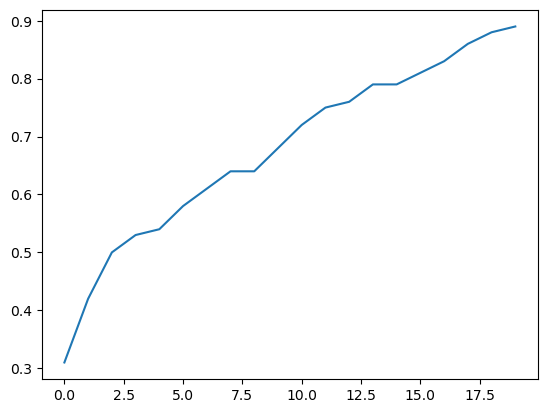

In [37]:

# Train the model
te = 50
acc = []
tracc = []
dataset = torch.utils.data.TensorDataset(X_train_claim, y_train)
dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=1024, shuffle=True)
a = 20
for e in range(a, a+1):
    ctracc = 0
    model = TreeBiLSTM(num_words=2000, embed_size=60, hidden_size=64, fc_out_size=5000, output_size=1, dropout_rate=0.2).to(device)
    criterion = nn.BCELoss().to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    model.train()
    curtraacc = []
    for epoch in range(e):
        optimizer.zero_grad()
        outputs = model([X_train_claim.to(device), X_train_ss.to(device)])
        loss = criterion(outputs.squeeze(), y_train.to(device))
        losses.append(loss)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            predictions = model([X_train_claim.to(device), X_train_ss.to(device)])
            predictions = (predictions > 0.5).to('cpu').int().squeeze().numpy()
        train_accuracy = metrics.accuracy_score(y_train.to(device).to('cpu'), predictions)
        ctracc += train_accuracy
        curtraacc.append(train_accuracy)

    ctracc /= e

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        predictions = model([X_test_claim.to(device), X_test_ss.to(device)])
        predictions = (predictions > 0.5).to('cpu').int().squeeze().numpy()

    print(f"Total Epochs: {e}, Train Accuracy: {ctracc} Test Accuracy: {metrics.accuracy_score(y_test.to('cpu'), predictions)}")
    acc.append(metrics.accuracy_score(y_test.to('cpu'), predictions))
    tracc.append(ctracc)
#     break
    plt.plot([i for i in range(a)], curtraacc)
# print('Max acc -', max(acc), ' with epochs -', acc.index(max(acc)))

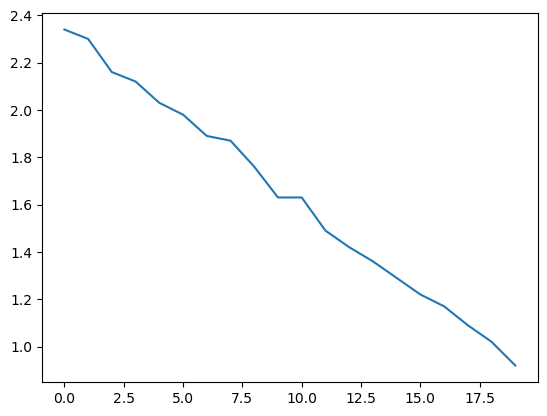

In [31]:

plt.plot([i for i in range(a)], [i for i in losses])

In [21]:
curtracc = [0.31, 0.42, 0.53, 0.64, 0.75, 0.79, 0.81, 0.86, 0.88, 0.89]

In [16]:
from sklearn.metrics import classification_report


model.eval()
with torch.no_grad():
    predictions = model([X_test_claim.to(device), X_test_ss.to(device)])
    predictions = (predictions > 0.5).to('cpu').int().squeeze().numpy()
    Y_TEST = y_test.to('cpu')
    
    
    print(classification_report(Y_TEST, predictions))

torch.Size([1342, 60, 128])
torch.Size([1342, 60, 128])
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       214
         1.0       0.84      1.00      0.91      1128

    accuracy                           0.84      1342
   macro avg       0.42      0.50      0.46      1342
weighted avg       0.71      0.84      0.77      1342



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:

# Train the model
te = 50
acc = []
tracc = []
dataset = torch.utils.data.TensorDataset(X_train_ss, y_train)
dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=1024, shuffle=True)
for e in range(1, te+1):
    ctracc = 0
    model = BiLSTM2(num_words=2000, embed_size=60, hidden_size=64, fc_out_size=5000, output_size=1, dropout_rate=0.2).to(device)
    criterion = nn.BCELoss().to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    model.train()
    for epoch in range(e):
        optimizer.zero_grad()
        outputs = model(X_train_ss.to(device))
        loss = criterion(outputs.squeeze(), y_train.to(device))
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            predictions = model(X_train_ss.to(device))
            predictions = (predictions > 0.5).to('cpu').int().squeeze().numpy()
        train_accuracy = metrics.accuracy_score(y_train.to(device).to('cpu'), predictions)
        ctracc += train_accuracy

    ctracc /= e

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        predictions = model(X_test_ss)
        predictions = (predictions > 0.5).to('cpu').int().squeeze().numpy()

    print(f"Total Epochs: {e}, Train Accuracy: {ctracc} Test Accuracy: {metrics.accuracy_score(y_test.to('cpu'), predictions)}")
    acc.append(metrics.accuracy_score(y_test.to('cpu'), predictions))
    tracc.append(ctracc)
#     break
print('Max acc -', max(acc), ' with epochs -', acc.index(max(acc)))

Total Epochs: 1, Train Accuracy: 0.854586129753915 Test Accuracy: 0.8405365126676602
Total Epochs: 2, Train Accuracy: 0.854586129753915 Test Accuracy: 0.8405365126676602
Total Epochs: 3, Train Accuracy: 0.854586129753915 Test Accuracy: 0.8405365126676602
Total Epochs: 4, Train Accuracy: 0.854586129753915 Test Accuracy: 0.8405365126676602
Total Epochs: 5, Train Accuracy: 0.8543624161073826 Test Accuracy: 0.8383010432190761
Total Epochs: 6, Train Accuracy: 0.8546172010937112 Test Accuracy: 0.8405365126676602
Total Epochs: 7, Train Accuracy: 0.8576755086822201 Test Accuracy: 0.815946348733234
Total Epochs: 8, Train Accuracy: 0.8576621923937361 Test Accuracy: 0.8137108792846498
Total Epochs: 9, Train Accuracy: 0.8545861297539152 Test Accuracy: 0.8405365126676602
Total Epochs: 10, Train Accuracy: 0.858296047725578 Test Accuracy: 0.7980625931445604
Total Epochs: 11, Train Accuracy: 0.8644668158090977 Test Accuracy: 0.8211624441132638
Total Epochs: 12, Train Accuracy: 0.8664243102162567 Test 